Globally compute features.  Each point will vote for a shape. If I have a point that's a gradient edge then he can vote.   Find lines with points to the origin.  The r is the perp to the line and the orgin and the theta is the off set I believe.  This is just for the lines.     Theta =atan(m).   Y=mx+b   r= b*cos(theta-pi/2)    Vertical lines screw it up . (use different quadaerants if so desire may need to adjust theta and pi/2).   Every line can described as an angle and radius.   Line in image to point.   Each point will make a wave graph thing.   Each time they overlap increase that array.   If not straight in it can compensate and adjust voting.   First get the valid points by the graident magnitude.  Three 2d arrays for circle one. Each for each circle radius.

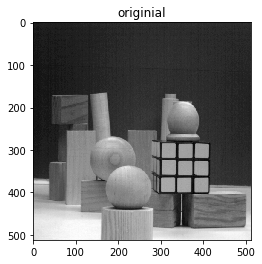

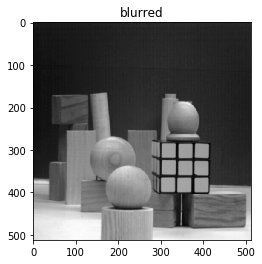

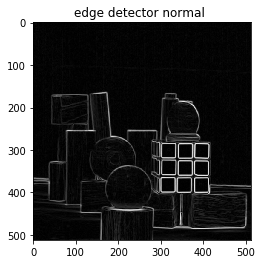

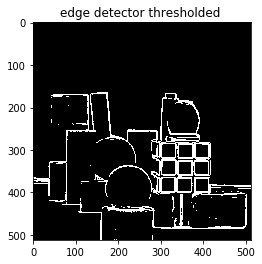

In [610]:
import numpy as np
from scipy import misc
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from skimage.draw import circle_perimeter
import cv2

def removeAnoyance(img, buffersize, circs):
    for x in range(img.shape[0]-buffersize):
        for y in range (img.shape[1]-buffersize):
            if np.count_nonzero(img[x:x+buffersize][y:y+buffersize])>circs:
                img[x:x+buffersize][y:y+buffersize]=0
def maxPos(img):
    return np.unravel_index(np.argmax(img), img.shape)
def median(img):
    for x in range(1, img.shape[0]-1):
        for y in range(1, img.shape[1]-1):
            img[x][y]=np.median(img[x-1:x+2, y-1:y+2])

def drawmycircles(radius, img_to_draw_on, image, specialmat):
    mypointstodraw=np.where(image>0)
    #print "size of valid circles ", len(mypointstodraw[0])
    for index in range(len(mypointstodraw[0])):
        x=mypointstodraw[0][index]
        y=mypointstodraw[1][index]
        rr, cc=circle_perimeter(x, y, radius)
        stuff=np.where(rr<0)
        stuff2=np.where(rr>255)
        stuff3=np.where(cc<0)
        stuff4=np.where(cc>255)
        if len(stuff[0])>0 or len(stuff2[0])>0 or len(stuff3[0])>0 or len(stuff4[0])>0:
            specialmat[rr, cc]=0
        else:    
            img_to_draw_on[rr, cc, 0]=255
            img_to_draw_on[rr, cc, 1]=0
            img_to_draw_on[rr, cc, 2]=0
def EnhanceTheBlue(img,start, stop):              
    img[start, stop]+=250
            

def part4(grad, zerocrossing):
    img=np.zeros(zerocrossing.shape)
    print grad.shape
    print zerocrossing.shape
    for x in range(0, grad.shape[0]):
        for y in range(0, grad.shape[1]):
            if zerocrossing[x][y]==1 and grad[x][y]==1:
                #print "this happens!"
                img[x][y]=255
    return img            

def mysigpointsfunc(img):
    return np.where(img>200)

def new_scale_for_orient(img):
    img+=7
    img*=18
    return img

def threshold(img, hold):
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            if img[x,y]>hold:
                img[x,y]=1
            else:
                img[x,y]=0
                
def sobelxandy(img, xkernel, ykernel, grayscale):
    for x in range(1, grayscale.shape[0]-1):
        for y in range(1, grayscale.shape[1]-1):
            Gx=np.sum(xkernel*grayscale[x-1:x+2, y-1:y+2])
            Gy=np.sum(ykernel*grayscale[x-1:x+2, y-1:y+2])
            img[x,y]=math.sqrt(Gx*Gx+Gy*Gy)
def gradorientation(img, xkernel, ykernel, grayscale):
    #arctan(Sy / Sx)
    for x in range(1, grayscale.shape[0]-1):
        for y in range(1, grayscale.shape[1]-1):
            Gx=np.sum(xkernel*grayscale[x-1:x+2, y-1:y+2])
            Gy=np.sum(ykernel*grayscale[x-1:x+2, y-1:y+2])
            img[x,y]=math.atan2(Gy,Gx)
def convolve(img, kernel,grayscale, divisor=1):
    for x in range(1, grayscale.shape[0]-1):
        for y in range(1, grayscale.shape[1]-1):
            sumofit=np.sum(kernel*grayscale[x-1:x+2, y-1:y+2])/divisor
            img[x,y]=sumofit
def findZeroCrossings(original, newimage):
    for x in range(original.shape[0]):
        for y in range(original.shape[1]):
            op=original[x,y]
            if op>0:
                if original[x,y+1]<0 or original[x+1, y]<0 or original[x+1, y+1]<0:
                    newimage[x,y]=1
            if op<0:
                if original[x,y+1]>0 or original[x+1, y]>0 or original[x+1, y+1]>0:
                    newimage[x,y]=1
    return newimage                    


grayscale=misc.imread("blocks.png", mode="L")
plt.imshow(grayscale, cmap='gray')
plt.title("originial")
plt.show()
temparray=np.zeros(grayscale.shape)

xkernel=np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
ykernel=np.array([[1, 2, 1], [0,0,0], [-1, -2, -1]])
gausiankernel=np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) #guassian might need to be adjusted!
lapregular=np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
lapextended=np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
lapextended2=np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])

convolve(grayscale, gausiankernel, np.copy(grayscale), 16)

plt.title("blurred")
plt.imshow(grayscale, cmap='gray')
plt.show()


sobelxandy(temparray, xkernel, ykernel, grayscale)
plt.title("edge detector normal ")        
plt.imshow(temparray, cmap='gray')
plt.show()

gradient=np.copy(temparray)
threshold(temparray, 75)
plt.title("edge detector thresholded ")        
plt.imshow(temparray, cmap='gray')
plt.show()








So for the first part (A part 1),  I simply read in the gray image, used a gausian blur on it then applied the sobel kernels on it to find the edges.  For my threshold I choose 70 and above to become white (aka edges).  I wanted it to be pretty sensitive so that it would "detect" as many of the "valid" edges as possible without picking up too much background noise. 

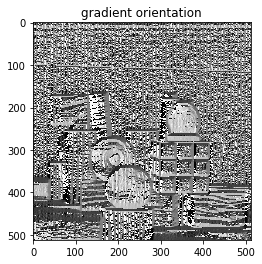

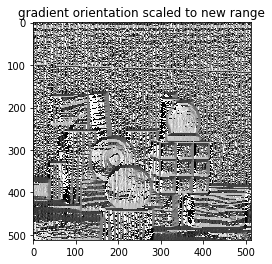

In [611]:
#threshold make binary image
temparray=np.zeros(grayscale.shape)

gradorientation(temparray, xkernel, ykernel, grayscale)
plt.title("gradient orientation")        
plt.imshow(temparray, cmap='gray')
plt.show()


temparray=new_scale_for_orient(temparray)


plt.title("gradient orientation scaled to new range")        
plt.imshow(temparray, cmap='gray')
plt.show()






So for part 2 I calculated the gradient orientation.  I then scaled it so that there would not be any negative values by shifting the values all up by 7 (which is approximatly 2pi) and then multiplying by 18 (which places all the values approximatly in the range from 0-255).   However it seems that plt already shift these over to the apporiate range regardless which is why they look the same. 

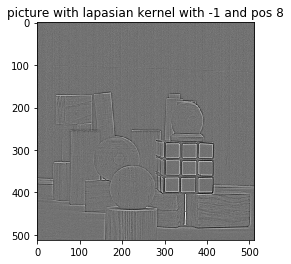

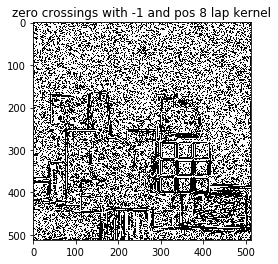

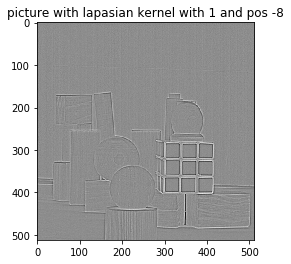

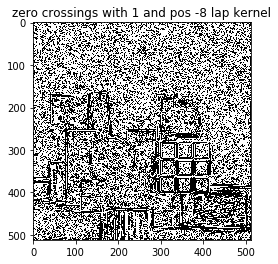

In [612]:
temparray=np.zeros(grayscale.shape)
convolve(temparray, lapextended , grayscale)
#print temparray, "this is lapasian"

#temparray=histogram(temparray)
plt.title("picture with lapasian kernel with -1 and pos 8")        
plt.imshow(temparray, cmap='gray')
plt.show()


#lapacian to the original image not gradient 
zerocrossings=np.zeros(temparray.shape)
temp=findZeroCrossings( temparray, zerocrossings)
dude=np.copy(temp)
#temparray=histogram(temparray)
plt.title("zero crossings with -1 and pos 8 lap kernel")        
plt.imshow(temp, cmap='gray')
plt.show()




temparray=np.zeros(grayscale.shape)
convolve(temparray, lapextended2 , grayscale)
#print temparray, "this is lapasian"

#temparray=histogram(temparray)
plt.title("picture with lapasian kernel with 1 and pos -8")        
plt.imshow(temparray, cmap='gray')
plt.show()


zerocrossings=np.zeros(temparray.shape)
temp=findZeroCrossings( temparray, zerocrossings)
#temparray=histogram(temparray)
plt.title("zero crossings with 1 and pos -8 lap kernel")        
plt.imshow(temp, cmap='gray')
plt.show()


(512, 512)
(512, 512)


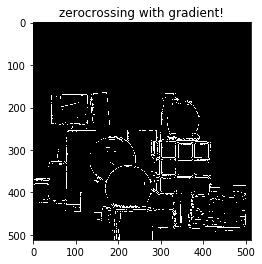

In [613]:

threshold(gradient, 50)
myresult=part4(gradient, temp)
plt.title("zerocrossing with gradient!")        
plt.imshow(myresult, cmap='gray')
plt.show()

So Its seems that this method works pretty well and gets them even thinner.  I adjusted the threshold to be 50. 

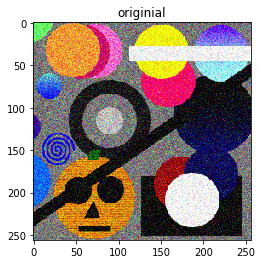

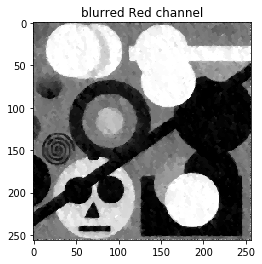

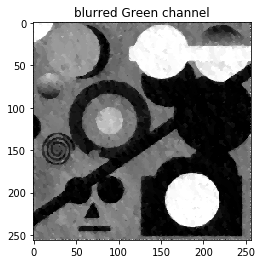

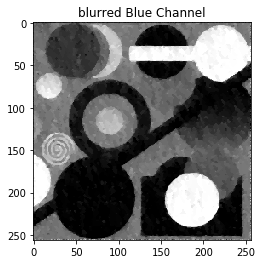

In [614]:
simplecircle=misc.imread("circles.png")
simplecircle_R=simplecircle[:,:,0]
simplecircle_G=simplecircle[:,:,1]
simplecircle_B=simplecircle[:,:,2]
#32 64 96
#initialize 3d array
plt.imshow(simplecircle)
plt.title("originial")
plt.show()

median(simplecircle_R)
median(simplecircle_G)
median(simplecircle_B)

plt.imshow(simplecircle_R, cmap='gray')
plt.title("blurred Red channel")
plt.show()

plt.imshow(simplecircle_G, cmap='gray')
plt.title("blurred Green channel")
plt.show()

plt.imshow(simplecircle_B, cmap='gray')
plt.title("blurred Blue Channel")
plt.show()








So up above I seperated into the sperate color channels and blurred them each with a median to remove noise. 

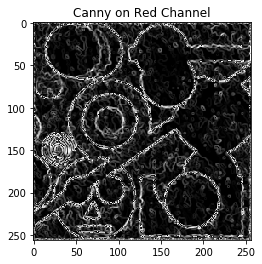

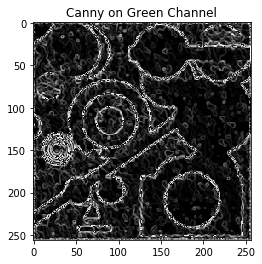

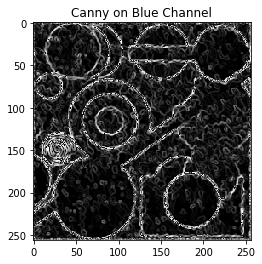

In [615]:
sobelxandy(simplecircle_R, xkernel, ykernel, np.copy(simplecircle_R))
plt.imshow(simplecircle_R, cmap='gray')
plt.title("Canny on Red Channel")
plt.show()

sobelxandy(simplecircle_G, xkernel, ykernel, np.copy(simplecircle_G))
plt.imshow(simplecircle_G, cmap='gray')
plt.title("Canny on Green Channel")
plt.show()

sobelxandy(simplecircle_B, xkernel, ykernel, np.copy(simplecircle_B))
plt.imshow(simplecircle_B, cmap='gray')
plt.title("Canny on Blue Channel")
plt.show()

I simply just ran the regular sobel edge detectors on them to get 3 different channels of edges!

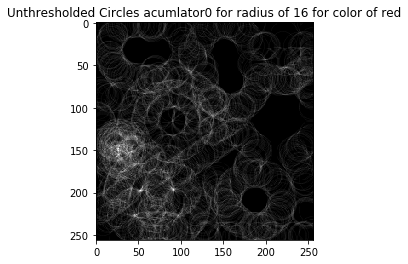

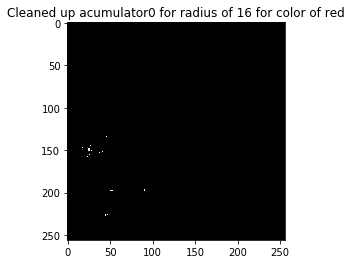

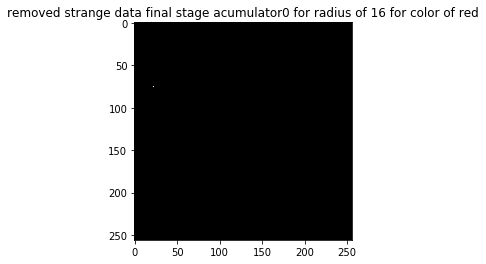

('I draw at index ', 75, 22, 16)
('I draw at index ', 115, 90, 16)
('I draw at index ', 195, 90, 16)
('I draw at index ', 196, 91, 16)
('I draw at index ', 197, 51, 16)
('I draw at index ', 197, 52, 16)
('I draw at index ', 197, 53, 16)
('I draw at index ', 197, 90, 16)
('I draw at index ', 197, 91, 16)
('I draw at index ', 198, 51, 16)
('I draw at index ', 198, 52, 16)
('I draw at index ', 198, 91, 16)


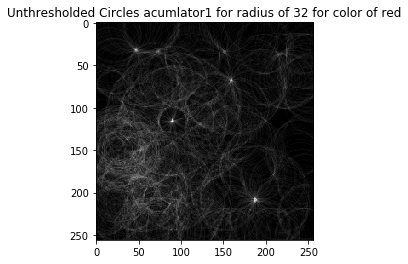

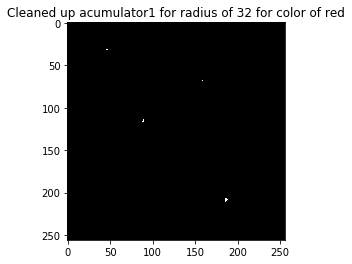

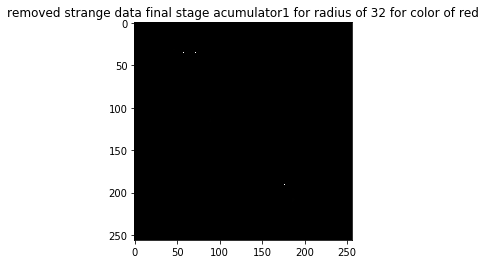

('I draw at index ', 32, 46, 32)
('I draw at index ', 32, 47, 32)
('I draw at index ', 35, 58, 32)
('I draw at index ', 35, 72, 32)
('I draw at index ', 68, 159, 32)
('I draw at index ', 114, 89, 32)
('I draw at index ', 115, 89, 32)
('I draw at index ', 115, 90, 32)
('I draw at index ', 116, 88, 32)
('I draw at index ', 116, 89, 32)
('I draw at index ', 116, 90, 32)
('I draw at index ', 117, 89, 32)
('I draw at index ', 185, 205, 32)
('I draw at index ', 190, 176, 32)
('I draw at index ', 207, 186, 32)
('I draw at index ', 207, 187, 32)
('I draw at index ', 208, 186, 32)
('I draw at index ', 208, 187, 32)
('I draw at index ', 208, 188, 32)
('I draw at index ', 209, 185, 32)
('I draw at index ', 209, 186, 32)
('I draw at index ', 209, 187, 32)
('I draw at index ', 210, 186, 32)


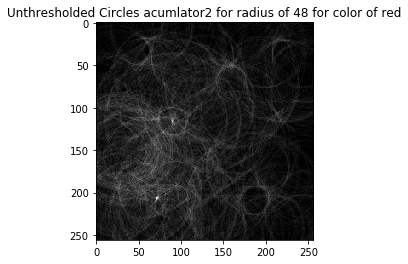

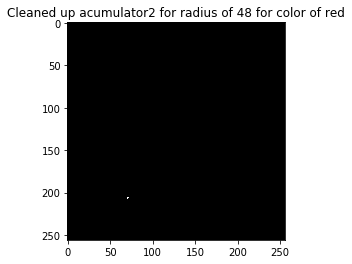

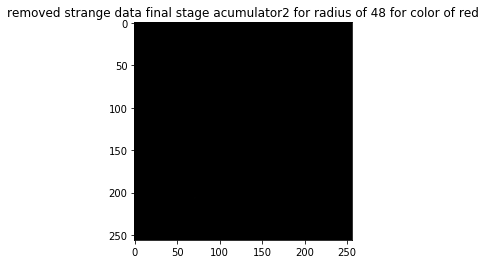

('I draw at index ', 50, 212, 48)
('I draw at index ', 205, 72, 48)
('I draw at index ', 206, 71, 48)
('I draw at index ', 206, 72, 48)
('I draw at index ', 207, 71, 48)


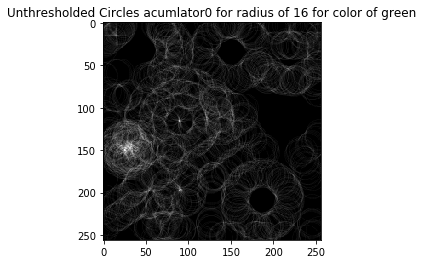

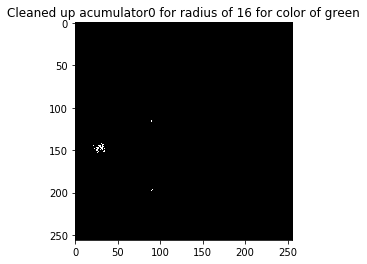

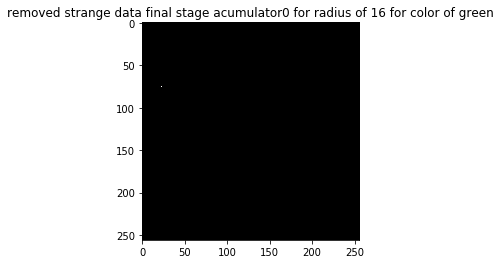

('I draw at index ', 75, 22, 16)
('I draw at index ', 115, 90, 16)
('I draw at index ', 196, 91, 16)
('I draw at index ', 197, 89, 16)
('I draw at index ', 198, 51, 16)
('I draw at index ', 198, 52, 16)
('I draw at index ', 198, 53, 16)


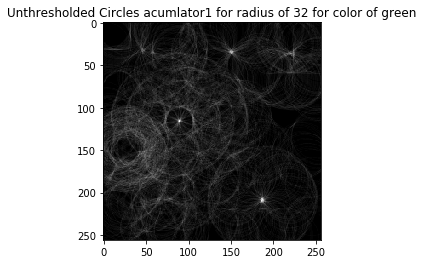

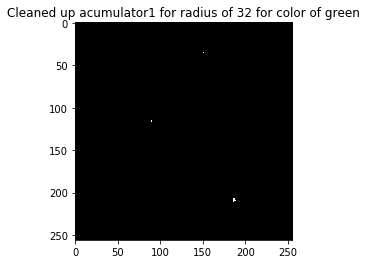

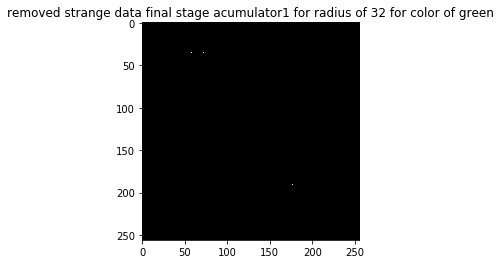

('I draw at index ', 35, 58, 32)
('I draw at index ', 35, 72, 32)
('I draw at index ', 35, 150, 32)
('I draw at index ', 35, 151, 32)
('I draw at index ', 36, 151, 32)
('I draw at index ', 115, 89, 32)
('I draw at index ', 115, 90, 32)
('I draw at index ', 116, 89, 32)
('I draw at index ', 116, 90, 32)
('I draw at index ', 185, 205, 32)
('I draw at index ', 190, 176, 32)
('I draw at index ', 207, 186, 32)
('I draw at index ', 207, 187, 32)
('I draw at index ', 208, 186, 32)
('I draw at index ', 208, 187, 32)
('I draw at index ', 209, 186, 32)
('I draw at index ', 209, 187, 32)
('I draw at index ', 209, 188, 32)
('I draw at index ', 210, 186, 32)


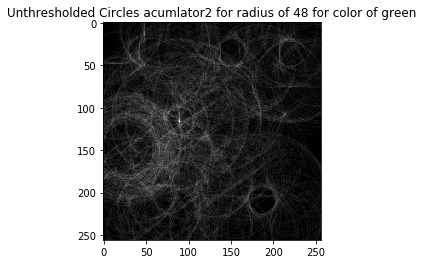

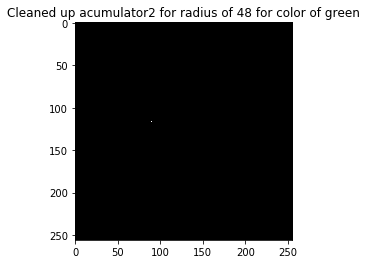

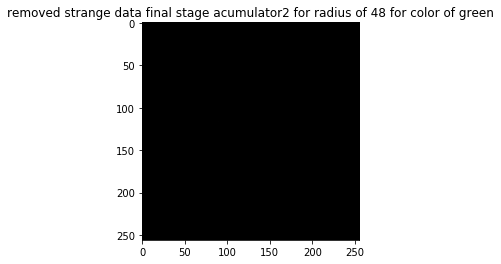

('I draw at index ', 50, 212, 48)
('I draw at index ', 116, 89, 48)


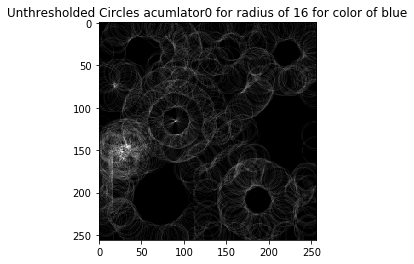

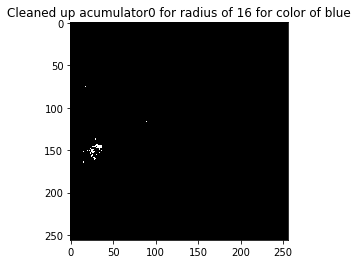

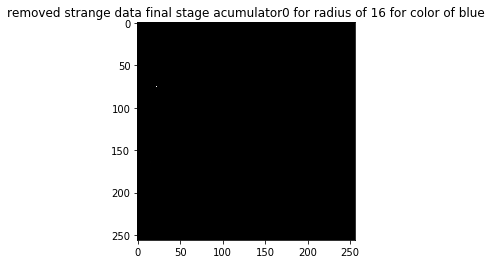

('I draw at index ', 75, 22, 16)
('I draw at index ', 115, 90, 16)


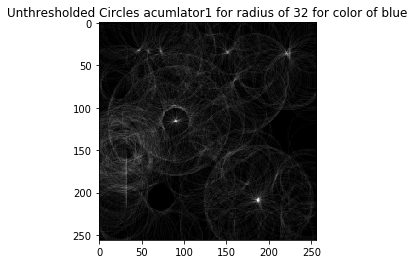

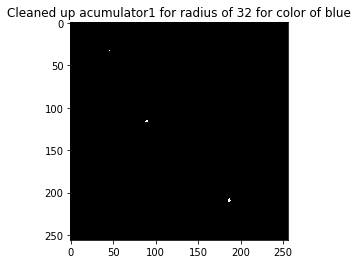

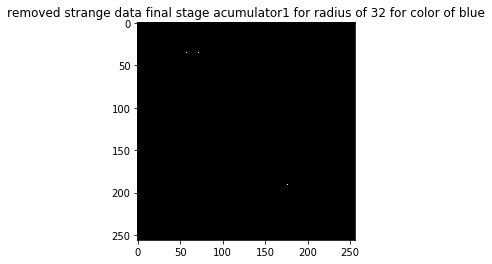

('I draw at index ', 33, 46, 32)
('I draw at index ', 35, 58, 32)
('I draw at index ', 35, 72, 32)
('I draw at index ', 37, 220, 32)
('I draw at index ', 115, 89, 32)
('I draw at index ', 115, 90, 32)
('I draw at index ', 115, 91, 32)
('I draw at index ', 116, 88, 32)
('I draw at index ', 116, 89, 32)
('I draw at index ', 116, 90, 32)
('I draw at index ', 116, 91, 32)
('I draw at index ', 185, 205, 32)
('I draw at index ', 190, 176, 32)
('I draw at index ', 207, 187, 32)
('I draw at index ', 208, 185, 32)
('I draw at index ', 208, 186, 32)
('I draw at index ', 208, 187, 32)
('I draw at index ', 209, 185, 32)
('I draw at index ', 209, 186, 32)
('I draw at index ', 209, 187, 32)
('I draw at index ', 209, 188, 32)
('I draw at index ', 210, 186, 32)
('I draw at index ', 210, 187, 32)


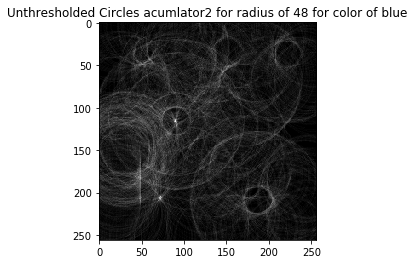

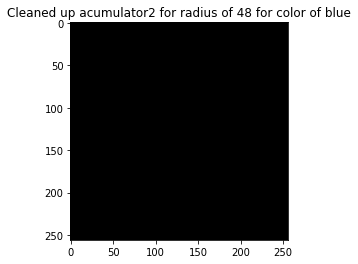

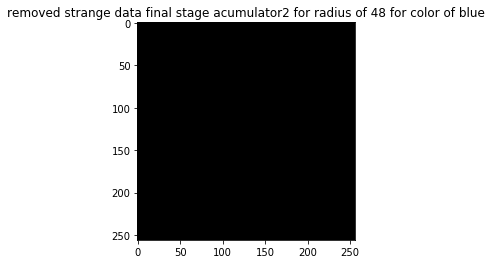

('I draw at index ', 50, 212, 48)
THIS IS HOW LONG IT TOOK TO RUN IT!
75.5876979828 seconds


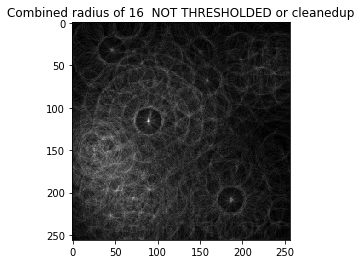

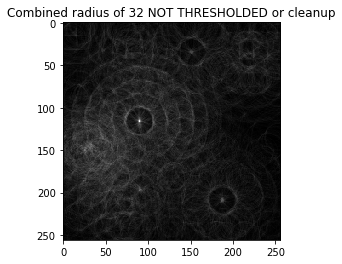

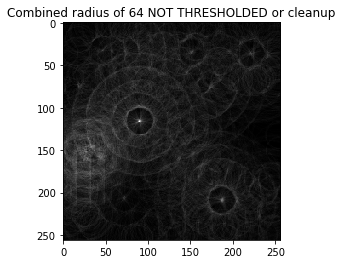

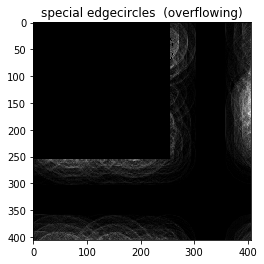

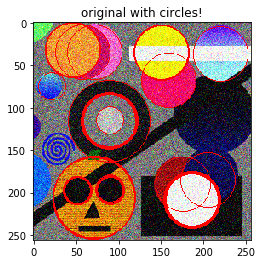

In [616]:
specialMatrix=np.zeros((simplecircle.shape[0]+150, simplecircle.shape[1]+150))  #this is for overflow edge cases

mastercopy=[np.zeros((256, 256)),np.zeros((256, 256)), np.zeros((256, 256)) ]  #this is for keeping track of everything

colordic={0:"red", 1:"green", 2:"blue"}

mylistofradius=[16,32 , 48]  

mydic={0: simplecircle_R, 1:simplecircle_G, 2:simplecircle_B}  #dic for the 3 channels

chanelStrength={0:1, 1:1, 2:1}

simplecircle=misc.imread("circles.png")
import time
start_time = time.time()  #start the timer!

for loc in range(len(mydic)):
    my3darray=np.zeros((len(mylistofradius),mydic[loc].shape[0],mydic[loc].shape[1]))
    #print loc
    currentarr=mydic[loc]
    mysigpoints=mysigpointsfunc(currentarr)
    for r in range(len(mylistofradius)):
        radius=mylistofradius[r]
        #print len(mysigpoints[0]),"hi"
        for pos in range(len(mysigpoints[0])):
            x=mysigpoints[0][pos]
            y=mysigpoints[1][pos]
            for theta in range(360):
            #print x,y
                a = x +radius * np.cos(theta * math.pi / 180.0); #polar coordinate for center
                b = y +radius * np.sin(theta * math.pi / 180.0); #polar coordinate for center 
                a=round(a)
                b=round(b)
                if a>255 or a<0 or b>255 or b<0:
                    specialMatrix[int(a),int(b)]+=(1.0*chanelStrength[loc])
                else:    
                    my3darray[r,int(a),int(b)]+=(1.0*chanelStrength[loc])
                #print my3darray
                #exit()
#read in grayscale blurred image
    for acm in range(len(mylistofradius)):    
        plt.imshow(my3darray[acm], cmap='gray')
        plt.title("Unthresholded Circles acumlator"+str(acm)+" for radius of "+str(mylistofradius[acm])+ " for color of "+colordic[loc] )
        plt.show()
        mastercopy[loc]+=my3darray[acm]
        threshold(my3darray[acm], 64)
        plt.imshow(my3darray[acm], cmap='gray')
        plt.title("Cleaned up acumulator"+str(acm)+" for radius of "+str(mylistofradius[acm])+" for color of "+colordic[loc])
        plt.show()
        removeAnoyance(my3darray[acm], 50, 15)
        plt.imshow(my3darray[acm], cmap='gray')
        plt.title("removed strange data final stage acumulator"+str(acm)+" for radius of "+str(mylistofradius[acm])+" for color of "+colordic[loc])
        plt.show()
        drawmycircles(mylistofradius[acm], simplecircle, my3darray[acm], specialMatrix)

print "THIS IS HOW LONG IT TOOK TO RUN IT!"        
print time.time() - start_time, "seconds"   

plt.title("Combined radius of 16  NOT THRESHOLDED or cleanedup")
plt.imshow(mastercopy[0], cmap='gray')
plt.show()        
        
plt.title("Combined radius of 32 NOT THRESHOLDED or cleanup")
plt.imshow(mastercopy[1], cmap='gray')
plt.show()        
        

plt.title("Combined radius of 64 NOT THRESHOLDED or cleanup")
plt.imshow(mastercopy[2], cmap='gray')
plt.show()        
        
    
plt.title("special edgecircles  (overflowing)")
plt.imshow(specialMatrix, cmap='gray')
plt.show()

plt.imshow(simplecircle)
plt.title("original with circles!")
plt.show()



        

Hey so sorry I'm running out of time so I will do my best to explain what is going on.  So I broke it into the respective channels thresholded them to get "significant points" and then ran a cleanup algrithum to remove noise and duplicate points.  My duplicate essentially just removed lots of nearby points if there were a certain ammount of them!. I also enhanced the blue channel because those circles didn't seem to have enough "power" to get heard on their own, so the blue channel was increased in relation to the others. I wasn't sure what the accumulator was wanted to be like so I combined all three channels (un enhanced un filtered) acumloators with  the respective radius again at the end with all the color channels.  You can also see every seperate accumulator as well along with the cleaned up and thresholded ones above too so all the work is there! (Sorry to make you go through them all).   Also the picture itself speaks for itself too that it works!!!  I wasn't able to do the  edge circles at the edge of the picture to show up on the image at the end as I ran out of time but I was able to get their points as you can see above too (Although this doesn't seem to matter as I have met the circle requirments that Dr Farrell posted on slack).  This took my like 20+ hours easily! I spent all day on it!
